In [1]:
#Declarar las librerias ocupadas para llevar el analisis cuantitativo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import csv

import wordcloud
from wordcloud import WordCloud

from transformers import pipeline

from sklearn.preprocessing import RobustScaler



In [2]:
#Verificacion de datos (primera fase)

rawD = pd.read_csv('Datathon 2024 - Reto Hey - Dataset Puìblico - Sheet1.csv')

rawD.shape

(812, 3)

In [3]:
#Verificacion visual de datos (segunda fase)

with open('Datathon 2024 - Reto Hey - Dataset Puìblico - Sheet1.csv', 'r', encoding='utf-8') as f:
    csv_reader = csv.reader(f)
    for line in csv_reader:
        # process each line
        print(line)

['date', 'time', 'tweet']
['2023-01-01', '', 'Resuelto, muchísimas gracias , excelente servicio como siempre']
['2023-01-02', '', 'Muchas gracias, espero su dm']
['2023-01-02', '', 'Muchas gracias!']
['2023-01-02', '', 'Algo similar me paso. Quería renovar mi token para poder hacer una transferencia antes de cerrar la cuenta y wow. Fue más fácil sacar el dinero por ventanilla.']
['2023-01-02', '', 'Yeeeei! a través de mi cuenta en acabo de contratar mi cuenta de ahorro con mi reto de 2023 para tener 25 mil pesos al final del año. Tiene una súper herramienta para domiciliar a mi cuenta eje y así ahorrar disciplinadamente cada semana! Vamos !!! 💪🏼💰']
['2023-01-02', '', 'Esta es la señal que necesitan para tener el mínimo dinero en banamex']
['2023-01-03', '', 'Gracias 😁']
['2023-01-03', '', 'Muchas gracias 😊']
['2023-01-03', '', 'Yo no sé mucho, pero te recomiendo la Inversión de . De los mejores rendimientos que he visto, y plazo a 7 días. También el de está chingón, pero tienen un lími

In [4]:
#Division de datos por palabra clave

data = rawD.dropna(subset=['tweet'])
data.shape

# Seleccion de palabras de interes para analizar
Topicos=['servicio', 'tarjetas', 'app', 'promociones', 'recompensas', 'tasas', 'seguros']

# filtro de filas para cada palabra clave
for word in Topicos:
    filtered_data = data[data['tweet'].str.contains(word, case=False)]

    # Uso de los nuevos datos filtrados por palabras clave
    print(f"Rows containing '{word}':")
    print(filtered_data)

Rows containing 'servicio':
           date      time                                              tweet
0    2023-01-01       NaN  Resuelto, muchísimas gracias , excelente servi...
12   2023-01-05       NaN  Mis Respetos para ustedes... Gracias por el se...
18   2023-01-06       NaN  Con el CashBack de pude pagar mi servicio de i...
37   2023-01-14       NaN  heybanco muchos años como cliente de bancomer ...
116  2023-02-04       NaN  Gracias por mi aumento de crédito en mi tarjet...
125  2023-02-11       NaN  Excelente servicio de atención a clientes en H...
178  2023-02-27       NaN  Entiendo le agradezco el comentario y como sug...
182  2023-02-28       NaN  Yo la tengo y es una maravilla, Servicio efici...
253  2023-03-23       NaN  Excelente servicio en atención a clientes 🫶🏻, ...
297  2023-04-11       NaN  5/ Seguramente veremos a y dando más noticias ...
298  2023-04-11       NaN  4/ La gran ventaja de es su experiencia de 5 a...
369  2023-06-01       NaN  Esto es lo que yo lla

In [5]:

# lista de textos de tweets y rawD['date'] es una lista de fechas correspondientes
sentences = [str(tweet) for tweet in rawD['tweet']]
dates = rawD['date']

#uso del modelo para clasificar comentarios
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

results = classifier(sentences)

#visualizacion de los nuevos datos ya clasificados
for result, date in zip(results, dates):
    print(f"Date: {date}, polarity: {result['label']}, score: {round(result['score'], 4)}")


C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Date: 2023-01-01, polarity: 5 stars, score: 0.834
Date: 2023-01-02, polarity: 5 stars, score: 0.7033
Date: 2023-01-02, polarity: 5 stars, score: 0.7375
Date: 2023-01-02, polarity: 3 stars, score: 0.4484
Date: 2023-01-02, polarity: 5 stars, score: 0.7519
Date: 2023-01-02, polarity: 5 stars, score: 0.5197
Date: 2023-01-03, polarity: 5 stars, score: 0.5859
Date: 2023-01-03, polarity: 5 stars, score: 0.6661
Date: 2023-01-03, polarity: 5 stars, score: 0.5647
Date: 2023-01-04, polarity: 5 stars, score: 0.5139
Date: 2023-01-04, polarity: 4 stars, score: 0.3872
Date: 2023-01-05, polarity: 5 stars, score: 0.5485
Date: 2023-01-05, polarity: 5 stars, score: 0.5857
Date: 2023-01-05, polarity: 1 star, score: 0.5362
Date: 2023-01-06, polarity: 5 stars, score: 0.6037
Date: 2023-01-06, polarity: 5 stars, score: 0.7245
Date: 2023-01-06, polarity: 5 stars, score: 0.501
Date: 2023-01-06, polarity: 1 star, score: 0.345
Date: 2023-01-06, polarity: 1 star, score: 0.2871
Date: 2023-01-07, polarity: 5 stars, 

In [6]:

# lista de textos de tweets y rawD['date'] es una lista de fechas correspondientes
sentences = [str(tweet) for tweet in rawD['tweet']]
dates = rawD['date']

#funcion para iterar la clasificacion de comentarios considerando la fecha del comentario
def analyze_sentiment(sentences, dates):
    classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")
    results = classifier(sentences)
    
    for result, date in zip(results, dates):
        yield date, result['label'], round(result['score'], 4)

# Lista de palabras clave para identificar en comentarios
Topicos = ['servicio', 'tarjetas', 'app', 'promociones', 'recompensas', 'tasas', 'seguros']

#Ciclo para evaluar el comentario por palabra clave y asi evaluarlo
for word in Topicos:
    filtered_data = data[data['tweet'].str.contains(word, case=False)]
    print(f"Rows containing '{word}':")
    print(filtered_data)

    # Realiza un análisis de sentimiento sobre los datos filtrados
    sentences_filtered = [str(tweet) for tweet in filtered_data['tweet']]
    dates_filtered = filtered_data['date']
    for date, polarity, score in analyze_sentiment(sentences_filtered, dates_filtered):
        print(f"Date: {date}, polarity: {polarity}, score: {score}")


Rows containing 'servicio':
           date      time                                              tweet
0    2023-01-01       NaN  Resuelto, muchísimas gracias , excelente servi...
12   2023-01-05       NaN  Mis Respetos para ustedes... Gracias por el se...
18   2023-01-06       NaN  Con el CashBack de pude pagar mi servicio de i...
37   2023-01-14       NaN  heybanco muchos años como cliente de bancomer ...
116  2023-02-04       NaN  Gracias por mi aumento de crédito en mi tarjet...
125  2023-02-11       NaN  Excelente servicio de atención a clientes en H...
178  2023-02-27       NaN  Entiendo le agradezco el comentario y como sug...
182  2023-02-28       NaN  Yo la tengo y es una maravilla, Servicio efici...
253  2023-03-23       NaN  Excelente servicio en atención a clientes 🫶🏻, ...
297  2023-04-11       NaN  5/ Seguramente veremos a y dando más noticias ...
298  2023-04-11       NaN  4/ La gran ventaja de es su experiencia de 5 a...
369  2023-06-01       NaN  Esto es lo que yo lla

C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Date: 2023-01-01, polarity: 5 stars, score: 0.834
Date: 2023-01-05, polarity: 5 stars, score: 0.5857
Date: 2023-01-06, polarity: 1 star, score: 0.2871
Date: 2023-01-14, polarity: 5 stars, score: 0.6474
Date: 2023-02-04, polarity: 5 stars, score: 0.8009
Date: 2023-02-11, polarity: 5 stars, score: 0.7477
Date: 2023-02-27, polarity: 4 stars, score: 0.392
Date: 2023-02-28, polarity: 5 stars, score: 0.9462
Date: 2023-03-23, polarity: 5 stars, score: 0.7501
Date: 2023-04-11, polarity: 5 stars, score: 0.8128
Date: 2023-04-11, polarity: 4 stars, score: 0.874
Date: 2023-06-01, polarity: 1 star, score: 0.3467
Date: 2023-06-21, polarity: 5 stars, score: 0.7729
Date: 2023-06-21, polarity: 1 star, score: 0.4562
Date: 2023-07-14, polarity: 3 stars, score: 0.2451
Date: 2023-07-18, polarity: 5 stars, score: 0.4294
Date: 2023-07-28, polarity: 5 stars, score: 0.4236
Date: 2023-08-01, polarity: 5 stars, score: 0.5701
Date: 2023-08-07, polarity: 5 stars, score: 0.4339
Date: 2023-08-25, polarity: 5 stars, 

C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Date: 2023-01-14, polarity: 5 stars, score: 0.6474
Date: 2023-03-30, polarity: 5 stars, score: 0.6169
Date: 2023-06-15, polarity: 1 star, score: 0.282
Date: 2023-07-06, polarity: 4 stars, score: 0.4062
Date: 2023-07-27, polarity: 4 stars, score: 0.3233
Date: 2023-08-12, polarity: 3 stars, score: 0.3581
Date: 2023-12-14, polarity: 1 star, score: 0.4493
Date: 2023-12-14, polarity: 1 star, score: 0.3009
Date: 2024-04-12, polarity: 1 star, score: 0.6846
Rows containing 'app':
           date      time                                              tweet
37   2023-01-14       NaN  heybanco muchos años como cliente de bancomer ...
135  2023-02-15       NaN  Hola intenta en el teléfono o correo de la ima...
182  2023-02-28       NaN  Yo la tengo y es una maravilla, Servicio efici...
190  2023-03-03       NaN  Se resolvió con la actualización de la app, gr...
204  2023-03-08       NaN  Se cayó la app de todo ha sido una buena exper...
226  2023-03-14       NaN  Super! Ojalá que esto pueda ser co

C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Date: 2023-01-14, polarity: 5 stars, score: 0.6474
Date: 2023-02-15, polarity: 5 stars, score: 0.3393
Date: 2023-02-28, polarity: 5 stars, score: 0.9462
Date: 2023-03-03, polarity: 4 stars, score: 0.2463
Date: 2023-03-08, polarity: 5 stars, score: 0.3097
Date: 2023-03-14, polarity: 5 stars, score: 0.7656
Date: 2023-05-12, polarity: 5 stars, score: 0.8688
Date: 2023-05-16, polarity: 2 stars, score: 0.3474
Date: 2023-06-24, polarity: 5 stars, score: 0.2676
Date: 2023-06-28, polarity: 1 star, score: 0.3232
Date: 2023-07-15, polarity: 1 star, score: 0.8267
Date: 2023-07-22, polarity: 5 stars, score: 0.6572
Date: 2023-08-18, polarity: 5 stars, score: 0.4679
Date: 2023-08-22, polarity: 5 stars, score: 0.3687
Date: 2023-09-01, polarity: 5 stars, score: 0.706
Date: 2023-09-16, polarity: 5 stars, score: 0.535
Date: 2023-09-16, polarity: 4 stars, score: 0.3084
Date: 2023-09-19, polarity: 5 stars, score: 0.4464
Date: 2023-09-20, polarity: 5 stars, score: 0.4615
Date: 2023-09-28, polarity: 5 stars

C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Date: 2024-01-04, polarity: 4 stars, score: 0.49
Rows containing 'recompensas':
           date      time                                              tweet
436  2023-07-06  02:24:11  😍 El nuevo diseño de las TDC de esta ma-ma-lón...
506  2023-08-22  00:52:31  En la Comunidarks me recomendaron la Rappicard...
595  2023-10-27  20:52:45  Gracias por mis ultimas recompensas, adios vaq...
663  2023-11-25  15:49:20          OJO ACA!! Regresan las recompensas a 🤩🤩🤩🤩
675  2023-12-01  21:23:51  🎁 ¡Promoción para todos nuestros clientes Hey!...
690  2023-12-17  16:29:51                        Amamos las recompensas de 🫡
714  2024-01-10  12:36:49  🎁 ¡Promoción para todos nuestros clientes Hey!...
784  2024-03-27  20:47:08  Yo sí recomiendo! Aunque siento que es difícil...


C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Date: 2023-07-06, polarity: 3 stars, score: 0.2842
Date: 2023-08-22, polarity: 5 stars, score: 0.3687
Date: 2023-10-27, polarity: 5 stars, score: 0.6468
Date: 2023-11-25, polarity: 5 stars, score: 0.2775
Date: 2023-12-01, polarity: 5 stars, score: 0.6641
Date: 2023-12-17, polarity: 5 stars, score: 0.6011
Date: 2024-01-10, polarity: 5 stars, score: 0.6641
Date: 2024-03-27, polarity: 5 stars, score: 0.5249
Rows containing 'tasas':
Empty DataFrame
Columns: [date, time, tweet]
Index: []
Rows containing 'seguros':
           date time                                              tweet
132  2023-02-14  NaN  Para ver si eres fit y viable para seguros de ...


C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Date: 2023-02-14, polarity: 5 stars, score: 0.4599


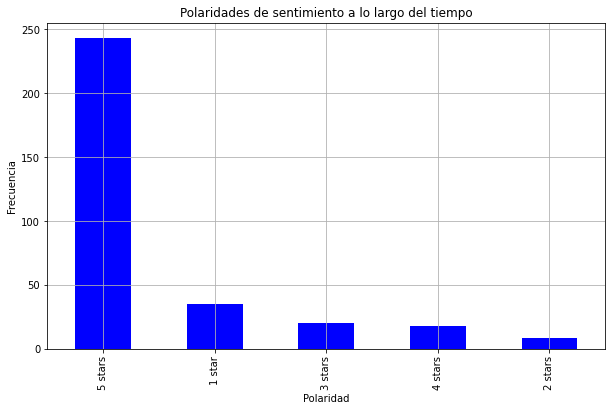

In [7]:
# lista de textos de tweets y rawD['date'] es una lista de fechas correspondientes
sentences = [str(tweet) for tweet in rawD['tweet']]
dates = rawD['date']

#Modelo para clasificar comentarios
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

results = classifier(sentences)

# Crea un DataFrame con las polaridades de fecha y sentimiento
df = pd.DataFrame({'Date': dates, 'Polarity': [result['label'] for result in results]})

# Convierte la columna 'Fecha' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Agrupa por fecha y calcular la polaridad media
daily_polarities = df.groupby(df['Date'].dt.date)['Polarity'].apply(lambda x: x.mode().iloc[0])

#Grafica de Barras
# Traza las polaridades de sentimiento a lo largo del tiempo
plt.figure(figsize=(10, 6))
daily_polarities.value_counts().plot(kind='bar', color='b')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.title('Polaridades de sentimiento a lo largo del tiempo')
plt.grid(True)
plt.show()

C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


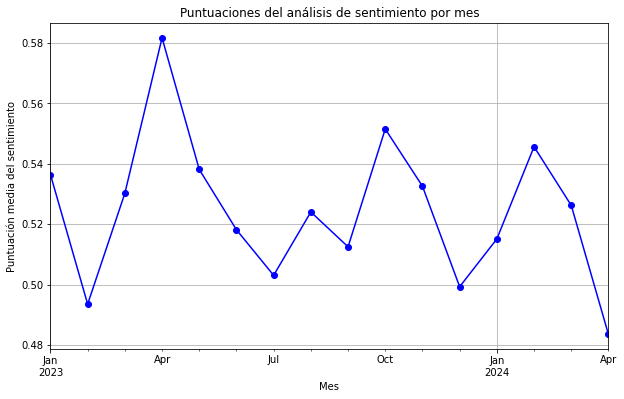

In [8]:
# lista de textos de tweets y rawD['date'] es una lista de fechas correspondientes
sentences = [str(tweet) for tweet in rawD['tweet']]
dates = rawD['date']

#modelo para clasificar comentarios 
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

results = classifier(sentences)

# Crea un DataFrame con la fecha y las puntuaciones de sentimiento
df = pd.DataFrame({'Date': dates, 'Score': [result['score'] for result in results]})

# Convierte la columna 'Fecha' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Agrupar por meses y calcular la puntuación media
monthly_scores = df.groupby(df['Date'].dt.to_period('M'))['Score'].mean()

#Grafica de tiempo 
# Traza las puntuaciones de sentimiento por mes
plt.figure(figsize=(10, 6))
monthly_scores.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Mes')
plt.ylabel('Puntuación media del sentimiento')
plt.title('Puntuaciones del análisis de sentimiento por mes')
plt.grid(True)
plt.show()


C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

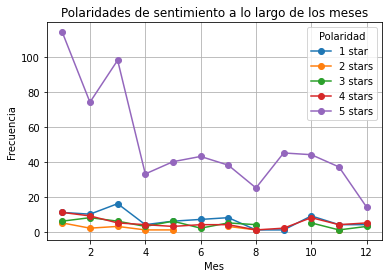

In [9]:
# lista de textos de tweets y rawD['date'] es una lista de fechas correspondientes
sentences = [str(tweet) for tweet in rawD['tweet']]
dates = rawD['date']

# modelo para clasificacr los comentarios
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

results = classifier(sentences)

# Crea un DataFrame con las polaridades de fecha y sentimiento
df = pd.DataFrame({'Date': dates, 'Polarity': [result['label'] for result in results]})

# Convierte la columna 'Fecha' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Tomar el parametro de Fechas en forma de Meses
df['Month'] = df['Date'].dt.month

# Agrupar por fecha y contar las polaridades únicas
daily_polarities = df.groupby(df['Date'].dt.date)['Polarity'].value_counts()
monthly_polarities = df.groupby(df['Month'])['Polarity'].value_counts()

# Desapilar el multiíndice para obtener un formato mejor
unstacked = daily_polarities.unstack(level=1)

#Grafica de tiempo 
# Traza las puntuaciones de sentimiento por mes de todos los datos
plt.figure(figsize=(10, 6))
monthly_polarities.unstack(level=1).plot.line(marker='o')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Polaridades de sentimiento a lo largo de los meses')
plt.grid(True)
plt.legend(title='Polaridad')
plt.show()

C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

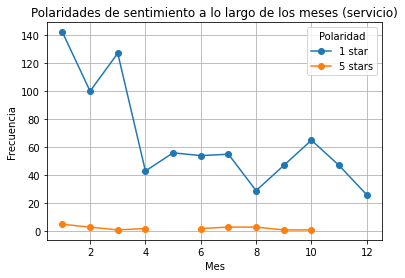

In [10]:
# lista de textos de tweets y rawD['date'] es una lista de fechas correspondientes tomando palabra clave
sentences = [str(tweet) for tweet in rawD['tweet'].str.contains("servicio")]
dates = rawD['date']

#modelo de clasificacion para los comentarios
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

results = classifier(sentences)

# Crea un DataFrame con las polaridades de fecha y sentimiento
df = pd.DataFrame({'Date': dates, 'Polarity': [result['label'] for result in results]})

# Convierte la columna 'Fecha' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Toma el parametro fecha y lo toma en forma de mes
df['Month'] = df['Date'].dt.month

# Agrupa por fecha y contar las polaridades únicas
daily_polarities = df.groupby(df['Date'].dt.date)['Polarity'].value_counts()
monthly_polarities = df.groupby(df['Month'])['Polarity'].value_counts()

# Desapila el multiíndice para obtener un formato mejor
unstacked = daily_polarities.unstack(level=1)

#Grafica de tiempo 
# Traza las puntuaciones de sentimiento por mes de todos los datos
plt.figure(figsize=(10, 6))
monthly_polarities.unstack(level=1).plot.line(marker='o')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Polaridades de sentimiento a lo largo de los meses (servicio)')
plt.grid(True)
plt.legend(title='Polaridad')
plt.show()


C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

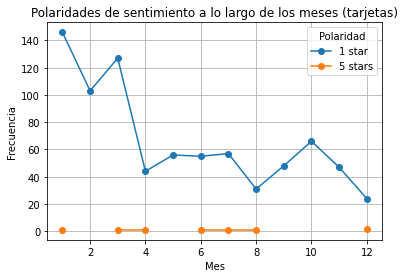

In [11]:
# lista de textos de tweets y rawD['date'] es una lista de fechas correspondientes tomando palabra clave
sentences = [str(tweet) for tweet in rawD['tweet'].str.contains("tarjetas")]
dates = rawD['date']

#modelo de clasificacion para los comentarios
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

results = classifier(sentences)

# Crea un DataFrame con las polaridades de fecha y sentimiento
df = pd.DataFrame({'Date': dates, 'Polarity': [result['label'] for result in results]})

# Convierte la columna 'Fecha' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Toma el parametro fecha y lo toma en forma de mes
df['Month'] = df['Date'].dt.month

# Agrupa por fecha y contar las polaridades únicas
daily_polarities = df.groupby(df['Date'].dt.date)['Polarity'].value_counts()
monthly_polarities = df.groupby(df['Month'])['Polarity'].value_counts()

# Desapila el multiíndice para obtener un formato mejor
unstacked = daily_polarities.unstack(level=1)

#Grafica de tiempo 
# Traza las puntuaciones de sentimiento por mes de todos los datos
plt.figure(figsize=(10, 6))
monthly_polarities.unstack(level=1).plot.line(marker='o')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Polaridades de sentimiento a lo largo de los meses (tarjetas)')
plt.grid(True)
plt.legend(title='Polaridad')
plt.show()


C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

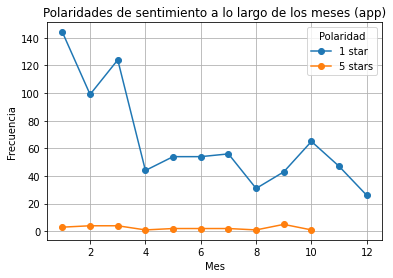

In [12]:
# lista de textos de tweets y rawD['date'] es una lista de fechas correspondientes tomando palabra clave
sentences = [str(tweet) for tweet in rawD['tweet'].str.contains("app")]
dates = rawD['date']

#modelo de clasificacion para los comentarios
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

results = classifier(sentences)

# Crea un DataFrame con las polaridades de fecha y sentimiento
df = pd.DataFrame({'Date': dates, 'Polarity': [result['label'] for result in results]})

# Convierte la columna 'Fecha' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Toma el parametro fecha y lo toma en forma de mes
df['Month'] = df['Date'].dt.month

# Agrupa por fecha y contar las polaridades únicas
daily_polarities = df.groupby(df['Date'].dt.date)['Polarity'].value_counts()
monthly_polarities = df.groupby(df['Month'])['Polarity'].value_counts()

# Desapila el multiíndice para obtener un formato mejor
unstacked = daily_polarities.unstack(level=1)

#Grafica de tiempo 
# Traza las puntuaciones de sentimiento por mes de todos los datos
plt.figure(figsize=(10, 6))
monthly_polarities.unstack(level=1).plot.line(marker='o')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Polaridades de sentimiento a lo largo de los meses (app)')
plt.grid(True)
plt.legend(title='Polaridad')
plt.show()


C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

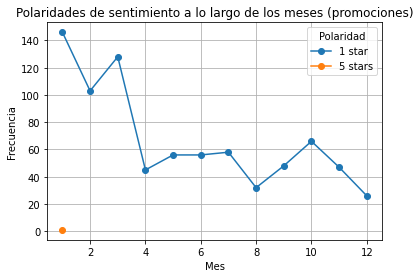

In [13]:
# lista de textos de tweets y rawD['date'] es una lista de fechas correspondientes tomando palabra clave
sentences = [str(tweet) for tweet in rawD['tweet'].str.contains("promociones")]
dates = rawD['date']

#modelo de clasificacion para los comentarios
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

results = classifier(sentences)

# Crea un DataFrame con las polaridades de fecha y sentimiento
df = pd.DataFrame({'Date': dates, 'Polarity': [result['label'] for result in results]})

# Convierte la columna 'Fecha' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Toma el parametro fecha y lo toma en forma de mes
df['Month'] = df['Date'].dt.month

# Agrupa por fecha y contar las polaridades únicas
daily_polarities = df.groupby(df['Date'].dt.date)['Polarity'].value_counts()
monthly_polarities = df.groupby(df['Month'])['Polarity'].value_counts()

# Desapila el multiíndice para obtener un formato mejor
unstacked = daily_polarities.unstack(level=1)

#Grafica de tiempo 
# Traza las puntuaciones de sentimiento por mes de todos los datos
plt.figure(figsize=(10, 6))
monthly_polarities.unstack(level=1).plot.line(marker='o')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Polaridades de sentimiento a lo largo de los meses (promociones)')
plt.grid(True)
plt.legend(title='Polaridad')
plt.show()


C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

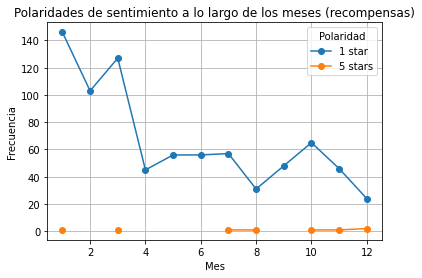

In [14]:
# lista de textos de tweets y rawD['date'] es una lista de fechas correspondientes tomando palabra clave
sentences = [str(tweet) for tweet in rawD['tweet'].str.contains("recompensas")]
dates = rawD['date']

#modelo de clasificacion para los comentarios
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

results = classifier(sentences)

# Crea un DataFrame con las polaridades de fecha y sentimiento
df = pd.DataFrame({'Date': dates, 'Polarity': [result['label'] for result in results]})

# Convierte la columna 'Fecha' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Toma el parametro fecha y lo toma en forma de mes
df['Month'] = df['Date'].dt.month

# Agrupa por fecha y contar las polaridades únicas
daily_polarities = df.groupby(df['Date'].dt.date)['Polarity'].value_counts()
monthly_polarities = df.groupby(df['Month'])['Polarity'].value_counts()

# Desapila el multiíndice para obtener un formato mejor
unstacked = daily_polarities.unstack(level=1)

#Grafica de tiempo 
# Traza las puntuaciones de sentimiento por mes de todos los datos
plt.figure(figsize=(10, 6))
monthly_polarities.unstack(level=1).plot.line(marker='o')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Polaridades de sentimiento a lo largo de los meses (recompensas)')
plt.grid(True)
plt.legend(title='Polaridad')
plt.show()


C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

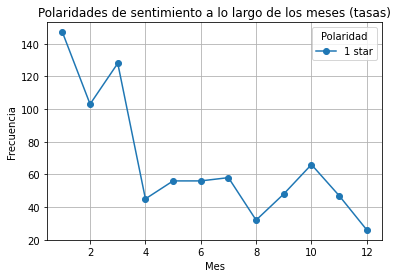

In [15]:
# lista de textos de tweets y rawD['date'] es una lista de fechas correspondientes tomando palabra clave
sentences = [str(tweet) for tweet in rawD['tweet'].str.contains("tasas")]
dates = rawD['date']

#modelo de clasificacion para los comentarios
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

results = classifier(sentences)

# Crea un DataFrame con las polaridades de fecha y sentimiento
df = pd.DataFrame({'Date': dates, 'Polarity': [result['label'] for result in results]})

# Convierte la columna 'Fecha' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Toma el parametro fecha y lo toma en forma de mes
df['Month'] = df['Date'].dt.month

# Agrupa por fecha y contar las polaridades únicas
daily_polarities = df.groupby(df['Date'].dt.date)['Polarity'].value_counts()
monthly_polarities = df.groupby(df['Month'])['Polarity'].value_counts()

# Desapila el multiíndice para obtener un formato mejor
unstacked = daily_polarities.unstack(level=1)

#Grafica de tiempo 
# Traza las puntuaciones de sentimiento por mes de todos los datos
plt.figure(figsize=(10, 6))
monthly_polarities.unstack(level=1).plot.line(marker='o')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Polaridades de sentimiento a lo largo de los meses (tasas)')
plt.grid(True)
plt.legend(title='Polaridad')
plt.show()


C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

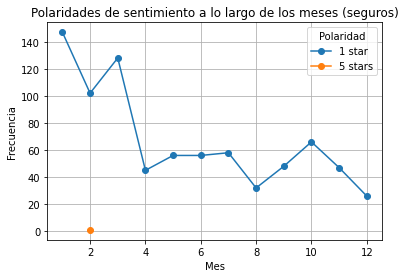

In [16]:
# lista de textos de tweets y rawD['date'] es una lista de fechas correspondientes tomando palabra clave
sentences = [str(tweet) for tweet in rawD['tweet'].str.contains("seguros")]
dates = rawD['date']

#modelo de clasificacion para los comentarios
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

results = classifier(sentences)

# Crea un DataFrame con las polaridades de fecha y sentimiento
df = pd.DataFrame({'Date': dates, 'Polarity': [result['label'] for result in results]})

# Convierte la columna 'Fecha' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Toma el parametro fecha y lo toma en forma de mes
df['Month'] = df['Date'].dt.month

# Agrupa por fecha y contar las polaridades únicas
daily_polarities = df.groupby(df['Date'].dt.date)['Polarity'].value_counts()
monthly_polarities = df.groupby(df['Month'])['Polarity'].value_counts()

# Desapila el multiíndice para obtener un formato mejor
unstacked = daily_polarities.unstack(level=1)

#Grafica de tiempo 
# Traza las puntuaciones de sentimiento por mes de todos los datos
plt.figure(figsize=(10, 6))
monthly_polarities.unstack(level=1).plot.line(marker='o')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Polaridades de sentimiento a lo largo de los meses (seguros)')
plt.grid(True)
plt.legend(title='Polaridad')
plt.show()


C:\Users\saulp\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


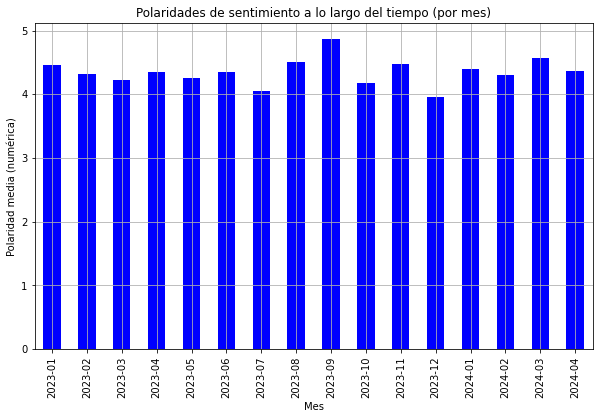

In [17]:
# lista de textos de tweets y rawD['date'] es una lista de fechas correspondientes tomando palabra clave
sentences = [str(tweet) for tweet in rawD['tweet']]
dates = rawD['date']

#modelo de clasificacion para los comentarios
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

results = classifier(sentences)

# Crea un DataFrame con las polaridades de fecha y sentimiento
df = pd.DataFrame({'Date': dates, 'Polarity': [result['label'] for result in results]})

# Convierte la columna 'Fecha' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Mapear etiquetas de texto a valores numéricos
polarity_mapping = {
    '1 star': 1,
    '2 stars': 2,
    '3 stars': 3,
    '4 stars': 4,
    '5 stars': 5
}
df['PolarityN'] = df['Polarity'].map(polarity_mapping)

# Agrupar por meses y calcular la puntuación media utilizando la nueva columna 'PolaridadN
monthly_scores = df.groupby(df['Date'].dt.to_period('M'))['PolarityN'].mean()

#Grafica de Barras
# Traza las polaridades de sentimiento a lo largo del tiempo por mes
plt.figure(figsize=(10, 6))
monthly_scores.plot(kind='bar', color='b')
plt.xlabel('Mes')
plt.ylabel('Polaridad media (numérica)')
plt.title('Polaridades de sentimiento a lo largo del tiempo (por mes)')
plt.grid(True)
plt.show()


In [18]:
#Lee y reconoce los datos de la base de datos para la lectrua de "reacciones"

df = pd.read_csv("heybanco_posts.csv",parse_dates=True)
hey_df = df[['date', 'likes', 'comments']]
hey_df['date'] = pd.to_datetime(hey_df['date']).dt.date


hey_df

C:\Users\saulp\AppData\Local\Temp/ipykernel_20472/3341250999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hey_df['date'] = pd.to_datetime(hey_df['date']).dt.date


,date,likes,comments
0,2024-02-01,234,0
1,2024-01-11,364,0
2,2024-03-12,448,3
3,2024-05-03,82,0
4,2024-05-03,100,0
...,...,...,...
1462,2021-03-25,195,4
1463,2021-03-25,146,1
1464,2021-03-25,134,1
1465,2021-03-25,307,8


In [19]:
#toma el formato adecuado para la fecha
hey_df['date'] = pd.to_datetime(hey_df['date']).dt.date
hey_df=hey_df.sort_values(by='date') 


groups = hey_df.groupby('date')

hey_df = groups.sum()

C:\Users\saulp\AppData\Local\Temp/ipykernel_20472/1464969738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hey_df['date'] = pd.to_datetime(hey_df['date']).dt.date


C:\Users\saulp\AppData\Local\Temp/ipykernel_20472/2652219800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hey_df['date'] = pd.to_datetime(hey_df['date']).dt.date
C:\Users\saulp\AppData\Local\Temp/ipykernel_20472/2652219800.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hey_df['date'] = pd.to_datetime(hey_df['date'])


Los valores criticos para HEY son de:
El valor maximo de Likes es:  59108
El valor minimo de Likes es:  62
El valor maximo de Comentarios es:  20250
El valor minimo de Comentarios es:  0


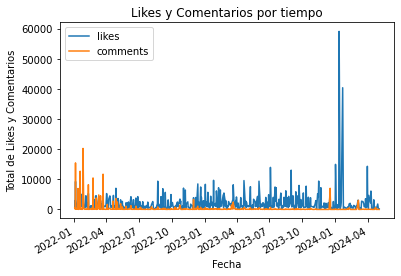

In [20]:
#Analisis para comentarios de IG de HEY
df = pd.read_csv("heybanco_posts.csv",parse_dates=True)
hey_df = df[['date', 'likes', 'comments']]
hey_df['date'] = pd.to_datetime(hey_df['date']).dt.date

hey_df

# hey_df with the desired structure

# Convertir la columna 'date' en Pandas Timestamp
hey_df['date'] = pd.to_datetime(hey_df['date'])

# Filtrar datos a partir de 2022-01-01
hey_df = hey_df[hey_df['date'] >= pd.to_datetime('2022-01-01')]

# Agrupa por fecha y calcula la suma de likes y comentarios
groups = hey_df.groupby('date')
hey_df = groups.sum()

print('Los valores criticos para HEY son de:')
# Calculo de los valores para likes
xmax_likes = hey_df['likes'].idxmax()
ymax_likes = hey_df['likes'].max()
ymin_likes = hey_df['likes'].min()

print('El valor maximo de Likes es: ', ymax_likes)
print('El valor minimo de Likes es: ', ymin_likes)

# Calculo de los valores para comentarios
xmin_comments = hey_df['comments'].idxmin()
ymax_comments = hey_df['comments'].max()
ymin_comments = hey_df['comments'].min()
print('El valor maximo de Comentarios es: ', ymax_comments)
print('El valor minimo de Comentarios es: ', ymin_comments)

# Grafica de Barras
# Traza las polaridades de sentimiento a lo largo del tiempo por mes
hey_df.plot()
plt.title("Likes y Comentarios por tiempo")
plt.xlabel("Fecha")
plt.ylabel("Total de Likes y Comentarios")
plt.show()

C:\Users\saulp\AppData\Local\Temp/ipykernel_20472/1928306318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nu_df['date'] = pd.to_datetime(nu_df['date']).dt.date
C:\Users\saulp\AppData\Local\Temp/ipykernel_20472/1928306318.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nu_df['date'] = pd.to_datetime(nu_df['date'])


Los valores criticos para Nu son de:
El valor maximo de Likes es:  5592
El valor minimo de Likes es:  155
El valor maximo de Comentarios es:  484
El valor minimo de Comentarios es:  0


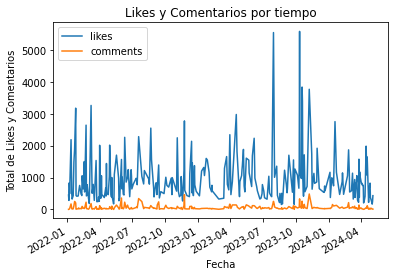

In [21]:

df = pd.read_csv("nu_posts.csv",parse_dates=True)
nu_df = df[['date', 'likes', 'comments']]
nu_df['date'] = pd.to_datetime(nu_df['date']).dt.date

nu_df

# nu_df with the desired structure

# Convertir la columna 'date' en Pandas Timestamp
nu_df['date'] = pd.to_datetime(nu_df['date'])

# Filtrar datos a partir de 2022-01-01
nu_df = nu_df[nu_df['date'] >= pd.to_datetime('2022-01-01')]

# Agrupa por fecha y calcula la suma de likes y comentarios
groups = nu_df.groupby('date')
nu_df = groups.sum()

print('Los valores criticos para Nu son de:')
# Calculo de los valores para likes
xmax_likes = nu_df['likes'].idxmax()
ymax_likes = nu_df['likes'].max()
ymin_likes = nu_df['likes'].min()
print('El valor maximo de Likes es: ', ymax_likes)
print('El valor minimo de Likes es: ', ymin_likes)

# Calculo de los valores para comentarios
xmin_comments = nu_df['comments'].idxmin()
ymax_comments = nu_df['comments'].max()
ymin_comments = nu_df['comments'].min()
print('El valor maximo de Comentarios es: ', ymax_comments)
print('El valor minimo de Comentarios es: ', ymin_comments)

#Grafica de Barras
# Traza las polaridades de sentimiento a lo largo del tiempo por mes
nu_df.plot()
plt.title("Likes y Comentarios por tiempo")
plt.xlabel("Fecha")
plt.ylabel("Total de Likes y Comentarios")
plt.show()